<div>
<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=220 height=220 align=left class="saturate">

<br>
<font face="Times New Roman">
<div dir=ltr align=center> 
<!-- <font color=0F5298 size=7> -->
<font color=0F5298 size=6>
    Introduction to Machine Learning <br> <br>
<!-- <font color=2565AE size=5> -->
<font size=5>
    Computer Engineering Department <br>
    Spring 2023 <br> <br>
<font color=606060 size=5>
    Homework 5: Practical - Lasso & Ridge Regression <br> <br>
<font color=686880 size=4>
    TAs: Alireza Dehghanpour - Arman Malekzadeh - Ali Salesi
    
____

### Full Name : Kian Omoomi
### Student Number : 98110062
### Colab Link:
___

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries. The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative.

In this assignment you have to predict **life expectancy**.

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import r2_score


# Data Exploration (20 points)

In [7]:
!wget -O ./dataset.csv "https://www.dropbox.com/s/2kz21qjt40pjy43/train.csv?dl=1"

--2023-05-09 16:14:58--  https://www.dropbox.com/s/2kz21qjt40pjy43/train.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/2kz21qjt40pjy43/train.csv [following]
--2023-05-09 16:14:59--  https://www.dropbox.com/s/dl/2kz21qjt40pjy43/train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd9928433b19476ea28fd1b7ce2.dl.dropboxusercontent.com/cd/0/get/B7sI7OXXldJaHXDpIF2YJIvQ-82NA7Q1xEC1un1HEU0izRO_FhPb6aIcJgJCplp9hBSkPRWdCQBzlQr2QVtMQnHKDDuMy0eJI9OQm7xKgx_l0NKPmI1q15oNxE6Ht4Lw6gv4YKatQqbDcfxHwS5VAhgT-WwkhCiGNUDLtk0iGtOkfKSNFRlPmwMZfv55yo9goOw/file?dl=1# [following]
--2023-05-09 16:15:00--  https://ucd9928433b19476ea28fd1b7ce2.dl.dropboxusercontent.com/cd/0/get/B7sI7OXXldJaHXDpIF2YJIvQ-82NA7Q1xEC1un1HEU0izRO_FhPb6aIcJgJCplp9hBSkPRWdCQBzlQr2QVtMQnHKDDuM

Load the dataset as a dataframe

In [108]:
df = pd.read_csv('./dataset.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Finland,2013,Developing,87.0,79.0,0,8.97,6115.496624,NaN,2,...,98.0,9.55,98.0,0.1,49638.771300,5438972.0,0.9,0.8,0.887,17.0
1,Japan,2015,Developed,83.7,55.0,2,NaN,0.000000,NaN,35,...,99.0,NaN,96.0,0.1,34474.137360,127141.0,2.1,1.8,0.902,15.3
2,Syrian Arab Republic,2014,Developing,64.4,294.0,7,0.01,0.000000,47.0,594,...,52.0,3.25,43.0,0.1,NaN,19239.0,6.3,6.1,0.575,9.0
3,Latvia,2010,Developed,72.8,18.0,0,9.80,1109.969508,91.0,0,...,92.0,6.55,92.0,0.1,11326.219470,297555.0,2.2,2.3,0.815,16.0
4,Sao Tome and Principe,2013,Developing,67.1,192.0,0,0.01,200.660099,97.0,0,...,97.0,9.76,97.0,0.2,1619.532678,18745.0,5.7,5.5,0.559,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492,Tunisia,2000,Developing,72.9,112.0,4,1.21,264.784220,94.0,47,...,97.0,5.40,97.0,0.1,2213.914880,9699197.0,6.6,6.5,0.646,12.8
2493,Myanmar,2001,Developing,62.5,239.0,72,0.38,1.917164,NaN,2519,...,77.0,1.80,73.0,0.4,138.924927,46627994.0,13.3,13.7,0.427,7.6
2494,Netherlands,2008,Developed,83.0,68.0,1,9.62,10873.405540,NaN,109,...,97.0,9.57,97.0,0.1,56928.824800,16445593.0,1.0,0.9,0.905,16.8
2495,South Sudan,2013,Developing,56.4,345.0,26,NaN,47.444530,NaN,525,...,5.0,2.62,45.0,3.6,1186.113250,1117749.0,NaN,NaN,0.417,4.9


Plot "year" against "average life expectancy"

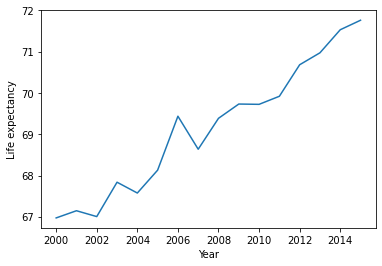

In [41]:
import matplotlib.pyplot as plt
df.groupby('Year')['Life expectancy '].mean().plot()
plt.ylabel('Life expectancy')
plt.show()

Compare the average life expectancy of "Developed" and "Developing" countries for each year 

In [42]:
df.groupby(['Year', 'Status'])['Life expectancy '].mean().unstack()

Status,Developed,Developing
Year,,
2000,76.891667,65.004959
2001,77.114286,65.048120
2002,77.710000,64.393496
2003,78.257692,65.617213
2004,78.452000,65.500000
2005,78.792593,65.898450
2006,79.346667,67.167939
2007,79.252381,66.935878
2008,78.796552,67.365185


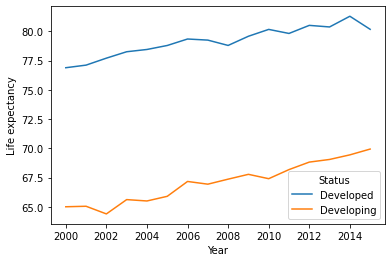

In [44]:
# this the plot for the dataframe above
df.groupby(['Year', 'Status'])['Life expectancy '].mean().unstack().plot()
plt.ylabel('Life expectancy')
plt.show()

Get the correlation between "Life expectancy" and "GDP"

In [45]:
df['Life expectancy '].corr(df['GDP'])

0.46525538795006427

Find out the feature having the strongest correlation with the "Life expectancy"<br>
Note: Do not display all of the correlation values. Your code should only print the result (the name of a column).

In [46]:
df.corr()['Life expectancy '].sort_values(ascending=False).index[1]

'Schooling'

# Preprocessing (20 points)

Remove the rows containing NaN (or null) values

In [109]:
df = df.dropna(axis=0)
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
3,Latvia,2010,Developed,72.8,18.0,0,9.80,1109.969508,91.0,0,...,92.0,6.55,92.0,0.1,11326.219470,297555.0,2.2,2.3,0.815,16.0
4,Sao Tome and Principe,2013,Developing,67.1,192.0,0,0.01,200.660099,97.0,0,...,97.0,9.76,97.0,0.2,1619.532678,18745.0,5.7,5.5,0.559,11.0
7,Colombia,2005,Developing,73.1,144.0,15,4.38,531.980818,93.0,0,...,93.0,5.82,93.0,0.1,3386.256000,43285634.0,2.4,2.1,0.658,11.1
11,Botswana,2012,Developing,63.4,3.0,2,0.01,12.834474,95.0,7,...,96.0,6.27,95.0,4.4,729.231453,289315.0,7.3,7.0,0.687,12.5
12,Mexico,2014,Developing,76.6,122.0,31,5.26,168.173753,84.0,3,...,87.0,6.30,87.0,0.1,1452.277660,1242216.0,1.6,1.5,0.754,13.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2481,Mauritius,2009,Developing,72.8,166.0,0,2.83,624.236183,99.0,15,...,99.0,4.97,99.0,0.1,7318.126410,1247429.0,7.3,7.3,0.734,13.8
2485,Mali,2009,Developing,56.0,276.0,55,0.59,84.634389,71.0,2939,...,77.0,6.85,73.0,1.6,697.153124,1466597.0,9.0,8.8,0.385,7.1
2488,Turkmenistan,2008,Developing,64.5,235.0,6,2.40,34.239794,96.0,0,...,96.0,1.93,96.0,0.1,394.467675,4935762.0,3.2,3.3,0.000,10.5
2490,Angola,2007,Developing,48.2,375.0,87,6.35,184.821345,73.0,1014,...,75.0,3.38,73.0,2.6,2878.837144,2997687.0,9.6,9.6,0.454,7.7


Convert categorical columns into their one-hot encoded versions

In [110]:
df = pd.get_dummies(df, columns=['Status', 'Country'])
df

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Zambia,Country_Zimbabwe
3,2010,72.8,18.0,0,9.80,1109.969508,91.0,0,58.9,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,67.1,192.0,0,0.01,200.660099,97.0,0,29.3,0,...,0,0,0,0,0,0,0,0,0,0
7,2005,73.1,144.0,15,4.38,531.980818,93.0,0,5.5,18,...,0,0,0,0,0,0,0,0,0,0
11,2012,63.4,3.0,2,0.01,12.834474,95.0,7,36.2,3,...,0,0,0,0,0,0,0,0,0,0
12,2014,76.6,122.0,31,5.26,168.173753,84.0,3,62.8,36,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2481,2009,72.8,166.0,0,2.83,624.236183,99.0,15,3.2,0,...,0,0,0,0,0,0,0,0,0,0
2485,2009,56.0,276.0,55,0.59,84.634389,71.0,2939,2.2,93,...,0,0,0,0,0,0,0,0,0,0
2488,2008,64.5,235.0,6,2.40,34.239794,96.0,0,42.7,8,...,0,0,1,0,0,0,0,0,0,0
2490,2007,48.2,375.0,87,6.35,184.821345,73.0,1014,18.8,138,...,0,0,0,0,0,0,0,0,0,0


Convert the dataframe into two numpy arrays (called `x` and `y`).<br>
To make the first array, remove the "Life expectancy" column, and convert the remaining dataframe to a numpy array.<br>
Then, use the removed column to make another numpy array (`y`).

In [111]:
X = df.drop(['Life expectancy '], axis=1).to_numpy()
y = df['Life expectancy '].to_numpy()

Normalize the data

In [112]:
X = preprocessing.scale(X)
y = preprocessing.scale(y)

# Model Training

Split the data to training (80%) and testing (20%) parts (5 points)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Common Regression Class

This is a regression class and you do not need to change its code. You have to fully understand it and then create new classes for rigde and lasso regression which inherit from this class.
For initialization you have to specify learning rate, number of iteration, and a regularization object.

In [114]:
class Regression:
    def __init__(self, learning_rate, iteration, regularization):
        
        self.N = None # number of samples
        self.n = None # number of features
        self.w = None # initial weights
        self.regularization = regularization # will be the l1/l2 regularization class according to the regression model
        self.lr = learning_rate
        self.it = iteration

    def loss_function(self, y, y_pred):
        return (1 / (2*self.N)) * np.sum(np.square(y_pred - y)) + self.regularization(self.w)
    
    def hypothesis(self, weights, X):
        return np.dot(X, weights)

    def train(self, X, y):
        # Target value should be in the shape of (n, 1) not (n, ).

        # Insert constant ones for bias weights.
        X = np.insert(X, 0, 1, axis=1)

        self.N = X.shape[0]
        self.n = X.shape[1]
        self.w = np.zeros((self.n , 1))

        for it in range(1, self.it+1):
            y_pred = self.hypothesis(self.w, X)
            cost = self.loss_function(y, y_pred)
            dw = (1/self.N) * np.dot(X.T, (y_pred - y)) + self.regularization.derivation(self.w)
            self.w = self.w - self.lr * dw

            if it % 10 == 0:
                print("The loss function for the iteration {}----->{} :)".format(it, cost))
        
    
    def predict(self, test_X):
        # Insert constant ones for bias weights.
        test_X = np.insert(test_X, 0, 1, axis=1)
        y_pred = self.hypothesis(self.w, test_X)
        return y_pred

# Regularization Classes (20 points)

You have to implement l2/l1 regularization.

In [115]:
class l1_regularization:
    """Regularization used for Lasso Regression"""
    def __init__(self, lamda):
        self.lamda = lamda

    def __call__(self, weights):
        "This will be returned when we call this class."
        regularization_term = self.lamda * np.sum(np.abs(weights))
        return regularization_term
    
    def derivation(self, weights):
        "Derivation of the regulariozation function."
        derivative_term = self.lamda * np.sign(weights)
        return derivative_term
        


class l2_regularization:
    """Regularization used for Ridge Regression"""
    def __init__(self, lamda):
        self.lamda = lamda

    def __call__(self, weights):
        "This will be retuned when we call this class."
        regularization_term = self.lamda * np.sum(np.square(weights))
        return regularization_term
        
    def derivation(self, weights):
        "Derivation of the regulariozation function."
        derivative_term = 2 * self.lamda * weights
        return derivative_term

# Lasso Regression from scratch (5 points)

Train a lasso regression model using your own code and the following class.

In [116]:
class LassoRegression(Regression):
    def __init__(self, lamda, learning_rate, iteration):
        self.regularization = l1_regularization(lamda)
        super(LassoRegression, self).__init__(learning_rate, iteration, self.regularization)

In [155]:
lasso_regression = LassoRegression(lamda=0.05, learning_rate=0.01, iteration=700)
lasso_regression.train(X_train, y_train.reshape(-1, 1))

The loss function for the iteration 10----->0.30599204473900365 :)
The loss function for the iteration 20----->0.23441582616344986 :)
The loss function for the iteration 30----->0.2046935793524749 :)
The loss function for the iteration 40----->0.18952511364837815 :)
The loss function for the iteration 50----->0.18055851881339613 :)
The loss function for the iteration 60----->0.1742918594065134 :)
The loss function for the iteration 70----->0.16979837301377781 :)
The loss function for the iteration 80----->0.16665066529732192 :)
The loss function for the iteration 90----->0.16387004613694983 :)
The loss function for the iteration 100----->0.16178861157400387 :)
The loss function for the iteration 110----->0.1601660770941958 :)
The loss function for the iteration 120----->0.15869248797619845 :)
The loss function for the iteration 130----->0.15743960169242405 :)
The loss function for the iteration 140----->0.15630830264299905 :)
The loss function for the iteration 150----->0.1554121723106

# Lasso Regression using skicit-learn (5 points)

Use `sklearn` to train a Lasso Regression Model. To determine the best regularization coefficients, use grid-search (or other techniques you've learned till now).

In [134]:
lasso = Lasso()
parameters = {'alpha': [0.1, 0.5, 1, 5, 10, 50, 100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.1, 0.5, 1, 5, 10, 50, 100]},
             scoring='neg_mean_squared_error')

# Ridge Regression From scratch (5 points)

Train a ridge regression model using your own code and the following class.

In [119]:
class RidgeRegression(Regression):
    def __init__(self, lamda, learning_rate, iteration):
        self.regularization = l2_regularization(lamda)
        super(RidgeRegression, self).__init__(learning_rate, iteration, self.regularization)

In [157]:
ridge_regression = RidgeRegression(lamda=0.01, learning_rate=0.01, iteration=700)
ridge_regression.train(X_train, y_train.reshape(-1, 1))


The loss function for the iteration 10----->0.23470637865014468 :)
The loss function for the iteration 20----->0.13572588246074266 :)
The loss function for the iteration 30----->0.09490437829125216 :)
The loss function for the iteration 40----->0.07370423227234102 :)
The loss function for the iteration 50----->0.06087294365734402 :)
The loss function for the iteration 60----->0.05240031338797829 :)
The loss function for the iteration 70----->0.04650513953715855 :)
The loss function for the iteration 80----->0.04224865250674413 :)
The loss function for the iteration 90----->0.0390817710005401 :)
The loss function for the iteration 100----->0.03666359385400525 :)
The loss function for the iteration 110----->0.03477423987608389 :)
The loss function for the iteration 120----->0.03326769335464448 :)
The loss function for the iteration 130----->0.0320444950252826 :)
The loss function for the iteration 140----->0.031035285683573423 :)
The loss function for the iteration 150----->0.03019061926

# Ridge Regression using scikit-learn (5 points)

Use `sklearn` to train a Ridge Regression Model. To determine the best regularization coefficients, use grid-search (or other techniques you've learned till now).

In [132]:
ridge = Ridge()
parameters = {'alpha': [0.1, 0.5, 1, 5, 10, 50, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)
ridge_regressor.best_params_

{'alpha': 5}

# Evaluation (15 points)

For each model (the 2 models trained using `sklearn` and the ones based on your code), predict the output for the testing samples.

In [137]:
y_pred_lasso_custom = lasso_regression.predict(X_test)
y_pred_lasso_sklearn = lasso_regressor.best_estimator_.predict(X_test)
y_pred_ridge_custom = ridge_regression.predict(X_test)
y_pred_ridge_sklearn = ridge_regressor.best_estimator_.predict(X_test)

Measure the performance of the models based on "mean squared error" and the "coefficient of determination" of the prediction.

In [138]:
print("Lasso Regression (custom) Mean squared error: %.2f" % mean_squared_error(y_test.reshape(-1, 1), y_pred_lasso_custom))
print("Lasso Regression (custom) Coefficient of determination: %.2f" % r2_score(y_test.reshape(-1, 1), y_pred_lasso_custom))
print("Lasso Regression (sklearn) Mean squared error: %.2f" % mean_squared_error(y_test.reshape(-1, 1), y_pred_lasso_sklearn.reshape(-1, 1)))
print("Lasso Regression (sklearn) Coefficient of determination: %.2f" % r2_score(y_test.reshape(-1, 1), y_pred_lasso_sklearn.reshape(-1, 1)))
print("Ridge Regression (custom) Mean squared error: %.2f" % mean_squared_error(y_test.reshape(-1, 1), y_pred_ridge_custom))
print("Ridge Regression (custom) Coefficient of determination: %.2f" % r2_score(y_test.reshape(-1, 1), y_pred_ridge_custom))
print("Ridge Regression (sklearn) Mean squared error: %.2f" % mean_squared_error(y_test.reshape(-1, 1), y_pred_ridge_sklearn.reshape(-1, 1)))
print("Ridge Regression (sklearn) Coefficient of determination: %.2f" % r2_score(y_test.reshape(-1, 1), y_pred_ridge_sklearn.reshape(-1, 1)))

Lasso Regression (custom) Mean squared error: 0.23
Lasso Regression (custom) Coefficient of determination: 0.78
Lasso Regression (sklearn) Mean squared error: 0.23
Lasso Regression (sklearn) Coefficient of determination: 0.78
Ridge Regression (custom) Mean squared error: 0.57
Ridge Regression (custom) Coefficient of determination: 0.46
Ridge Regression (sklearn) Mean squared error: 0.05
Ridge Regression (sklearn) Coefficient of determination: 0.95


# Kaggle

Competition Link: https://www.kaggle.com/t/adbf95666e7c4f41a6be1129a9e4415c

In [158]:
competition_df = pd.read_csv('./assignment5-test-data.csv')
id_column = competition_df['ID']
competition_df = competition_df.drop(['ID'], axis=1)
competition_df.fillna(competition_df.mean(), inplace=True)
competition_df = pd.get_dummies(competition_df, columns=['Status', 'Country'])
training_columns = df.drop(['Life expectancy '], axis=1).columns
for column in training_columns:
    if column not in competition_df.columns:
        competition_df[column] = 0
for column in competition_df.columns:
    if column not in training_columns:
        competition_df = competition_df.drop([column], axis=1)
competition_df = preprocessing.scale(competition_df)
y_pred_competition = lasso_regression.predict(competition_df).reshape(-1,)
y_pred_competition = y_pred_competition * df['Life expectancy '].std() + df['Life expectancy '].mean()
final_df = pd.DataFrame({'Life expectancy': y_pred_competition, 'ID': id_column})
final_df.to_csv('submission.csv', index=False)

C:\Users\kian\AppData\Local\Temp/ipykernel_31496/535281170.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  competition_df.fillna(competition_df.mean(), inplace=True)
